In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the matrix
noise_psd_matrix = np.load('psd_matrix_noise.npy')

# Print basic properties
print("Shape of the matrix:", noise_psd_matrix.shape)
print("First few elements:", noise_psd_matrix[0, 0, :5])

Shape of the matrix: (256, 2, 2)
First few elements: [0.02389029+0.0000000e+00j 0.01054322-7.1255825e-05j]


Matrix is not Hermitian.
Eigenvalues of the first frequency bin: [0.03184844-6.8527064e-05j 0.00992233+6.8527064e-05j]


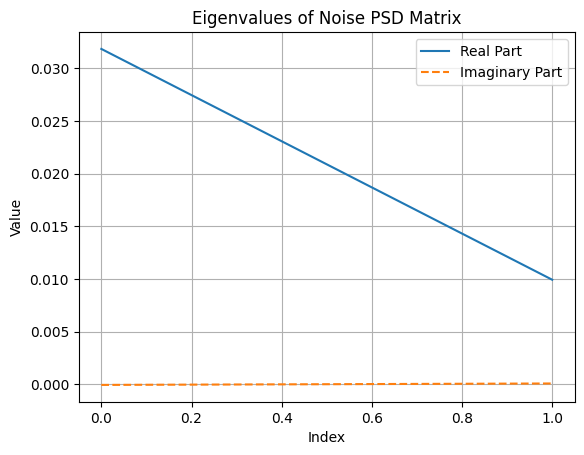

All eigenvalues are positive.


In [3]:

# Check if the matrix is Hermitian (complex-conjugate symmetry)
if np.allclose(noise_psd_matrix, np.conj(noise_psd_matrix.swapaxes(-2, -1))):
    print("Matrix is Hermitian.")
else:
    print("Matrix is not Hermitian.")

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(noise_psd_matrix[0, :, :])  # Example for the first frequency bin
print("Eigenvalues of the first frequency bin:", eigenvalues)

# Plot the real part of eigenvalues to check if any are non-positive
plt.figure()
plt.plot(eigenvalues.real, label='Real Part')
plt.plot(eigenvalues.imag, label='Imaginary Part', linestyle='--')
plt.title('Eigenvalues of Noise PSD Matrix')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Check for negative or zero values
if np.any(eigenvalues <= 0):
    print("There are non-positive eigenvalues indicating the matrix is not positive definite.")
else:
    print("All eigenvalues are positive.")


In [6]:
# Check if the imaginary parts are negligible compared to the real parts
max_imag = np.max(np.abs(np.imag(noise_psd_matrix)))
max_real = np.max(np.abs(np.real(noise_psd_matrix)))

if max_imag / max_real < 1e-1:  # e.g., some_small_threshold = 1e-5
    print("The imaginary parts are negligible.")
else:
    print("The imaginary parts are significant.")

The imaginary parts are significant.
